<a href="https://colab.research.google.com/github/shahulrashid/internship_tasks/blob/main/Task_5_Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
df = pd.read_csv("/content/drive/MyDrive/internship/heart.csv")

X = df.drop('target', axis=1)
y = df['target']

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [24]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, dt.predict(X_test))

print(f"Decision Tree Train Accuracy: {train_acc:.4f}")
print(f"Decision Tree Test Accuracy:  {test_acc:.4f}")

Decision Tree Train Accuracy: 1.0000
Decision Tree Test Accuracy:  0.9854


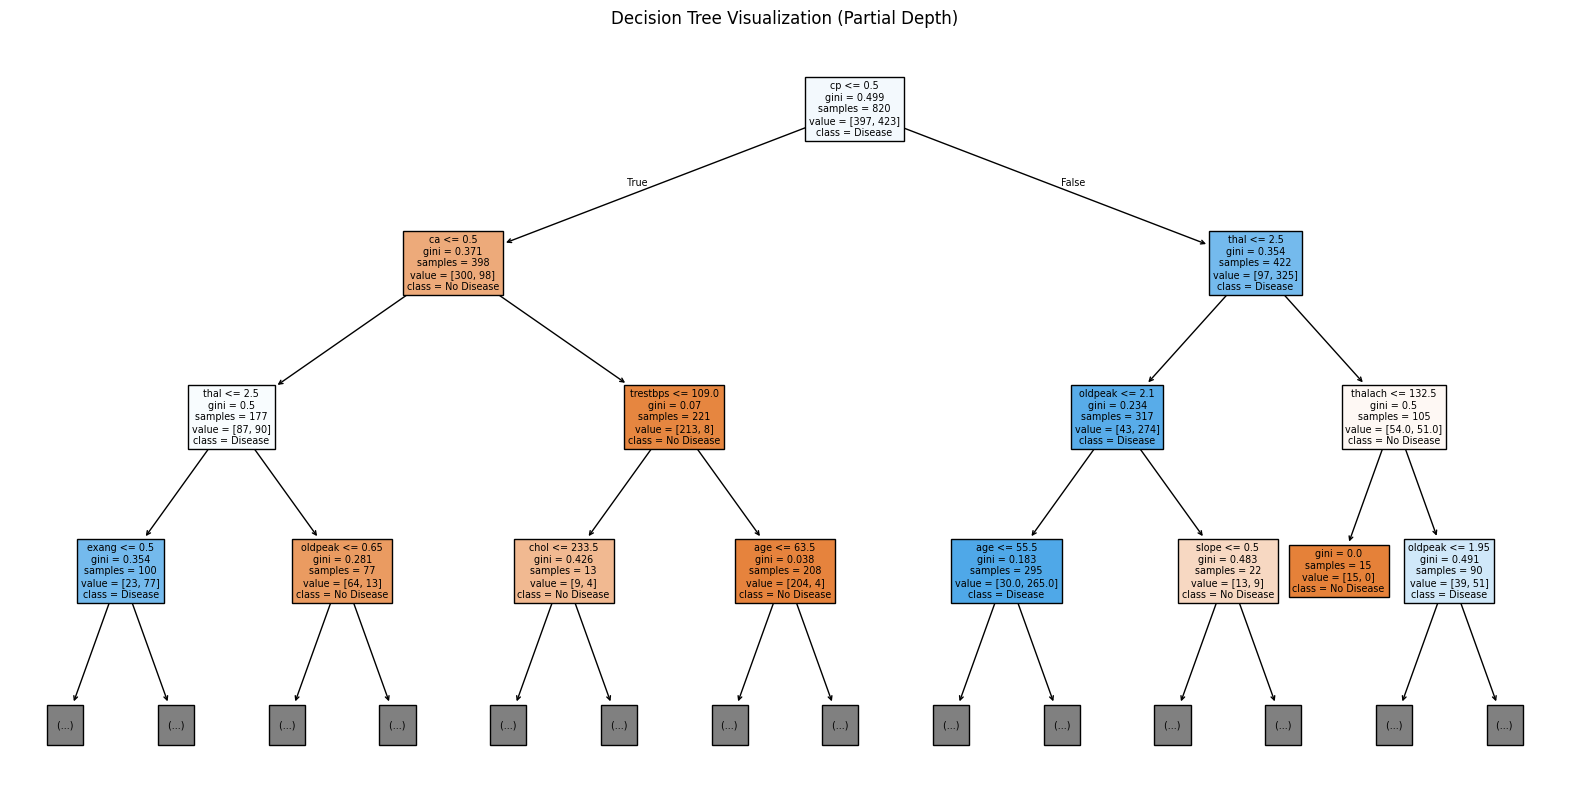

In [29]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, max_depth=3)
plt.title("Decision Tree Visualization (Partial Depth)")
plt.show()

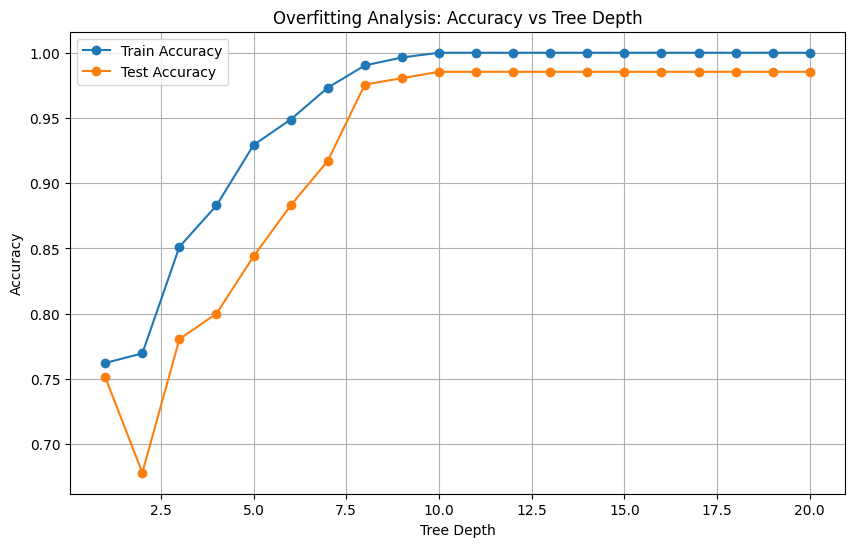

In [30]:
depths = range(1, 21)
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label="Train Accuracy", marker='o')
plt.plot(depths, test_scores, label="Test Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis: Accuracy vs Tree Depth")
plt.grid(True)
plt.legend()
plt.show()


In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Random Forest Train Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Test Accuracy:  {rf_test_acc:.4f}")


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy:  0.9854


     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


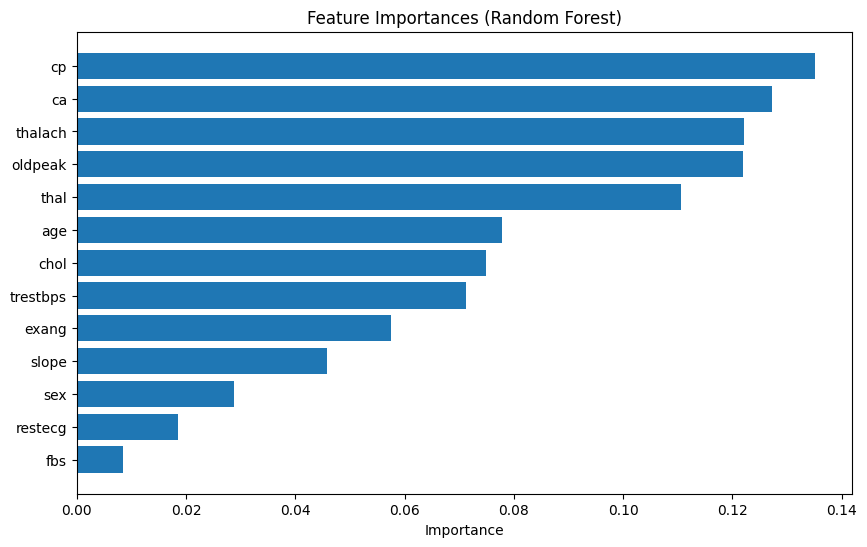

In [34]:
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [33]:
cv_scores = cross_val_score(rf, X, y, cv=5)

print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation Accuracy: 0.9971 ± 0.0059



### 1. **How does a decision tree work?**

A decision tree is a supervised machine learning algorithm that models decisions based on a tree-like structure. It splits the dataset into smaller and smaller subsets while simultaneously developing an associated tree. At each internal node, the model selects a feature and a threshold that best separates the classes or predicts the target variable. The splitting continues until the data is perfectly classified or another stopping criterion is met (like maximum depth). Leaf nodes represent final predictions. This hierarchical approach mimics human decision-making and can be used for both classification and regression tasks.

---

### 2. **What is entropy and information gain?**

Entropy is a measure from information theory that quantifies the impurity or disorder in a dataset. In the context of decision trees, it indicates how mixed the classes are within a node. If all data points in a node belong to a single class, the entropy is 0 (pure). Information gain measures how much entropy is reduced after a dataset is split on an attribute. It's calculated as the difference between the entropy of the parent node and the weighted average entropy of the child nodes. Decision trees choose the feature with the highest information gain to make splits, as it provides the most "useful" information for classification.

---

### 3. **How is random forest better than a single tree?**

A random forest is an ensemble method that builds multiple decision trees and combines their predictions. Unlike a single decision tree—which is prone to overfitting—random forests reduce variance by averaging the outputs of many trees trained on different subsets of the data and features. This randomness makes the model more robust and generalizable. As a result, random forests typically outperform individual decision trees in terms of accuracy and resilience to noise, especially in complex or high-dimensional datasets.

---

### 4. **What is overfitting and how do you prevent it?**

Overfitting occurs when a machine learning model learns not only the underlying patterns in the training data but also the noise. This results in excellent performance on training data but poor generalization to unseen data. In decision trees, overfitting is common when the tree becomes too deep or complex. It can be prevented by techniques like pruning (removing branches that add little value), setting a maximum tree depth, limiting the number of samples required to split a node, or using ensemble methods like random forests. Cross-validation also helps detect and mitigate overfitting.

---

### 5. **What is bagging?**

Bagging, or Bootstrap Aggregating, is an ensemble technique that improves model stability and accuracy. It involves training multiple models (typically of the same type, like decision trees) on different random subsets of the training data created through sampling with replacement. The final prediction is obtained by averaging the predictions (for regression) or taking a majority vote (for classification). Bagging helps reduce variance and is particularly effective with high-variance, low-bias models like decision trees. Random forest is a classic example of a bagging-based algorithm.

---

### 6. **How do you visualize a decision tree?**

A decision tree can be visualized using tools like `plot_tree()` from `scikit-learn` or exporting it to a `.dot` file for rendering with Graphviz. The tree visualization shows nodes representing decisions based on feature values, with branches representing outcomes of those decisions. Each node also displays information such as the feature used for splitting, threshold value, class distribution, and Gini or entropy. This visual aid helps users understand the logic of the model and identify the most influential features and splits.

---

### 7. **How do you interpret feature importance?**

Feature importance indicates how valuable each feature was in making decisions throughout the tree or forest. In a decision tree, it is based on the reduction in impurity (e.g., Gini or entropy) achieved by splits on that feature. In a random forest, it is averaged across all trees. A higher importance score means the feature contributes significantly to predicting the target variable. Visualizing feature importances as a bar plot helps prioritize which variables are most influential and can aid in feature selection or explainability.

---

### 8. **What are the pros and cons of random forests?**

**Pros:** Random forests are highly accurate, robust to overfitting, and can handle both classification and regression tasks. They manage missing values and scale well to high-dimensional data. They also provide useful estimates of feature importance, helping in interpretation and analysis.

**Cons:** However, random forests can be computationally intensive, especially with many trees or large datasets. They also lack interpretability compared to a single decision tree, making them less ideal when model transparency is crucial. Additionally, predictions may be slower in real-time applications due to the ensemble nature.

---

Let me know if you'd like this formatted as a report, slides, or educational handout!
